<a href="https://www.kaggle.com/code/sujithasurendran/black-friday-sales-prediction?scriptVersionId=99060307" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [106]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/traincsv/train.csv
/kaggle/input/black-friday-sales-prediction/train.csv
/kaggle/input/black-friday-sales-prediction/test.csv


Importing Dataset

In [107]:
test_data = pd.read_csv("/kaggle/input/black-friday-sales-prediction/test.csv")
test_data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [108]:
train_data = pd.read_csv("/kaggle/input/black-friday-sales-prediction/train.csv")
train_data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [109]:
train_data.shape

(550068, 12)

In [110]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [111]:
train_data.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [112]:
train_data['Product_Category_2'] =train_data['Product_Category_2'].fillna(0).astype('int64')
train_data['Product_Category_3'] =train_data['Product_Category_3'].fillna(0).astype('int64')

In [113]:
train_data.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64

In [114]:
train_data.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,6.735436,3.841941,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,6.215492,6.250712,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,0.000000,0.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,0.000000,0.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,5.000000,0.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,14.000000,8.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


Exploratory Data analysis

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Purchase', ylabel='Density'>

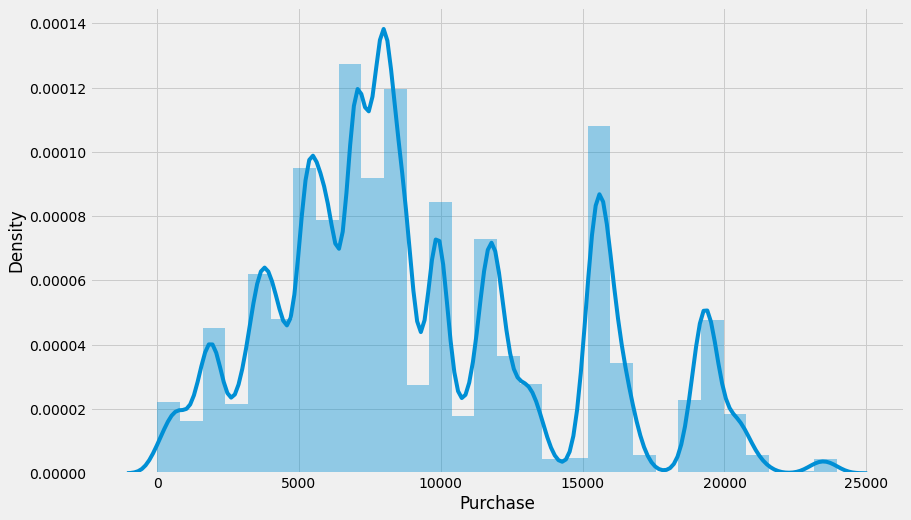

In [115]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(13,8))
sns.distplot(train_data['Purchase'], bins=30)


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Gender', ylabel='count'>

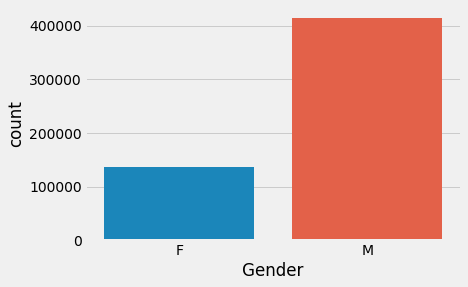

In [116]:
sns.countplot(train_data['Gender'])

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Age', ylabel='count'>

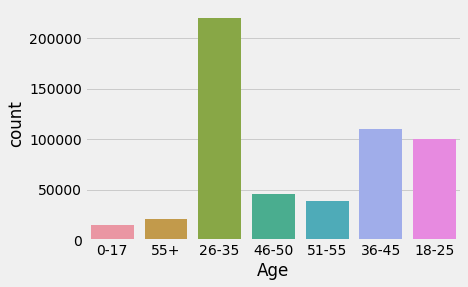

In [117]:
sns.countplot(train_data['Age'])

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Marital_Status', ylabel='count'>

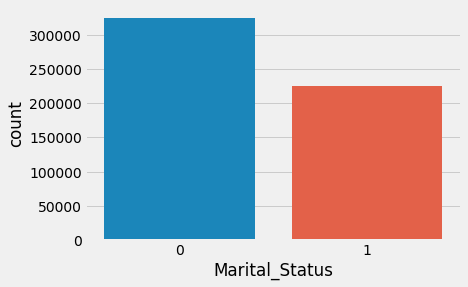

In [118]:
sns.countplot(train_data['Marital_Status'])

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Occupation', ylabel='count'>

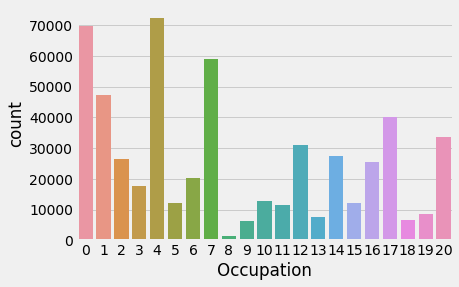

In [119]:
sns.countplot(train_data['Occupation'])

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Product_Category_1', ylabel='count'>

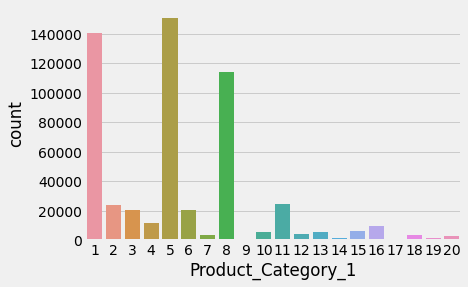

In [120]:
sns.countplot(train_data['Product_Category_1'])

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Product_Category_2', ylabel='count'>

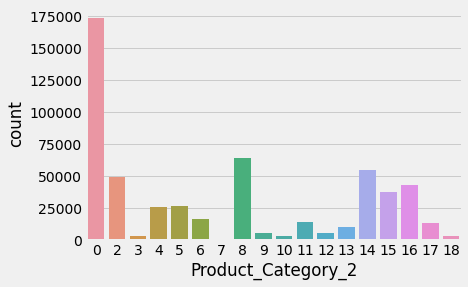

In [121]:
sns.countplot(train_data['Product_Category_2'])

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Product_Category_3', ylabel='count'>

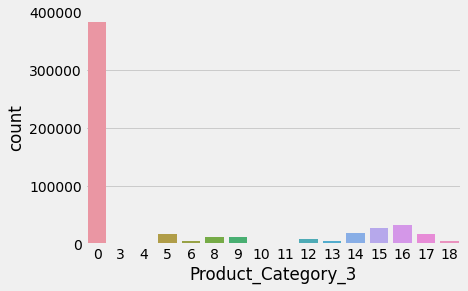

In [122]:
sns.countplot(train_data['Product_Category_3'])

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='City_Category', ylabel='count'>

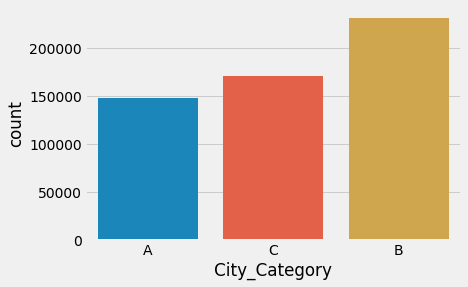

In [123]:
sns.countplot(train_data['City_Category'])

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Stay_In_Current_City_Years', ylabel='count'>

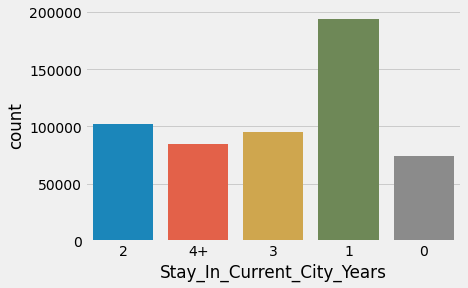

In [124]:
sns.countplot(train_data['Stay_In_Current_City_Years'])

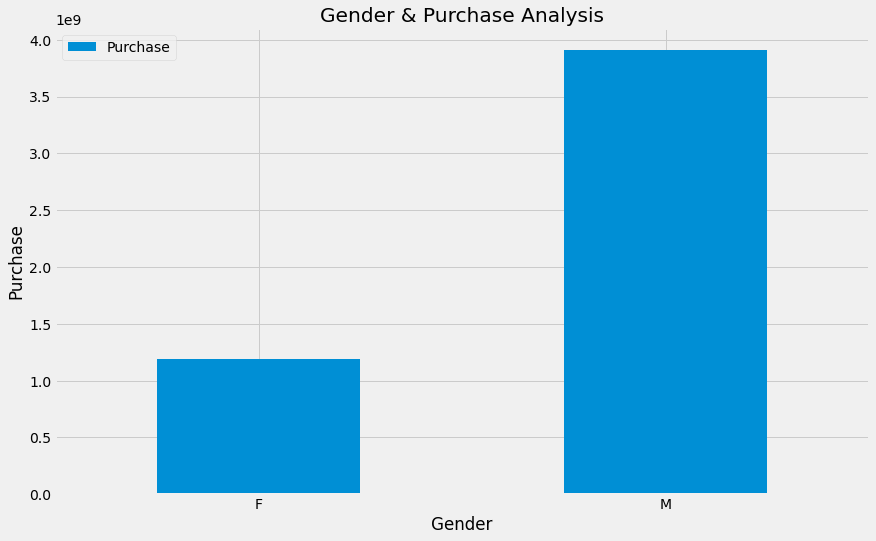

In [125]:
#Bivariate Analysis
Gender_plot = train_data.pivot_table(index='Gender', values = 'Purchase', aggfunc=np.sum)
Gender_plot.plot(kind='bar', figsize=(13,8))
plt.xlabel('Gender')
plt.ylabel('Purchase')
plt.xticks(rotation=0)
plt.title("Gender & Purchase Analysis")
plt.show()

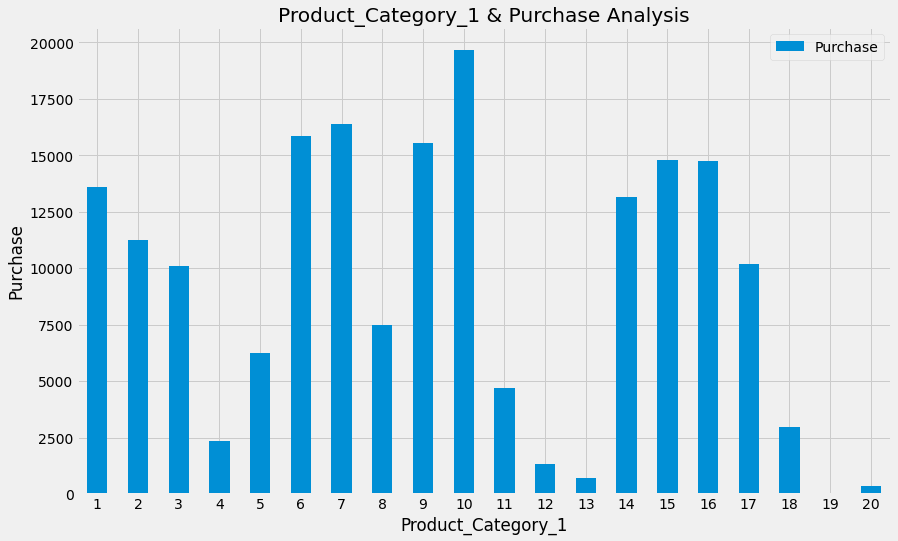

In [126]:
#Bivariate Analysis
Product_plot = train_data.pivot_table(index='Product_Category_1', values = 'Purchase', aggfunc=np.mean)
Product_plot.plot(kind='bar', figsize=(13,8))
plt.xlabel('Product_Category_1')
plt.ylabel('Purchase')
plt.xticks(rotation=0)
plt.title("Product_Category_1 & Purchase Analysis")
plt.show()

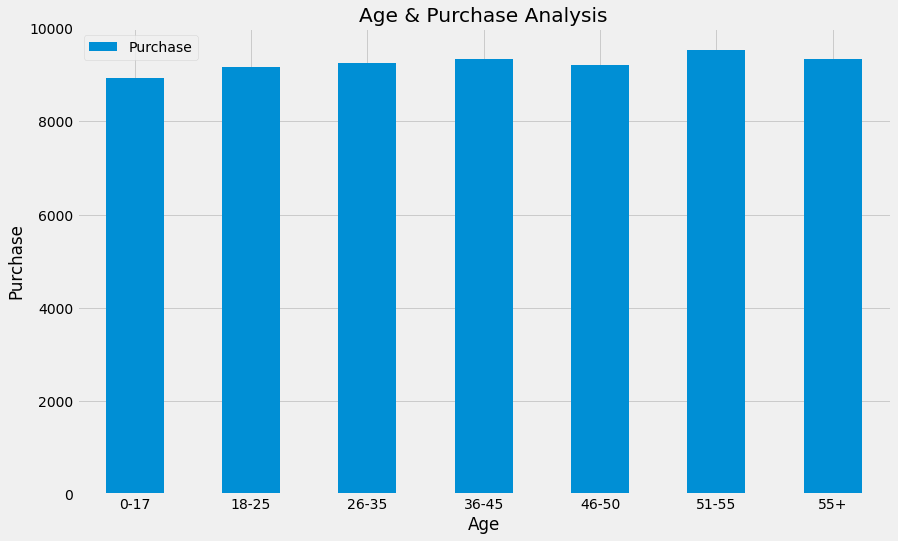

In [127]:
#Bivariate Analysis
Age_plot = train_data.pivot_table(index='Age', values = 'Purchase', aggfunc=np.mean)
Age_plot.plot(kind='bar', figsize=(13,8))
plt.xlabel('Age')
plt.ylabel('Purchase')
plt.xticks(rotation=0)
plt.title("Age & Purchase Analysis")
plt.show()


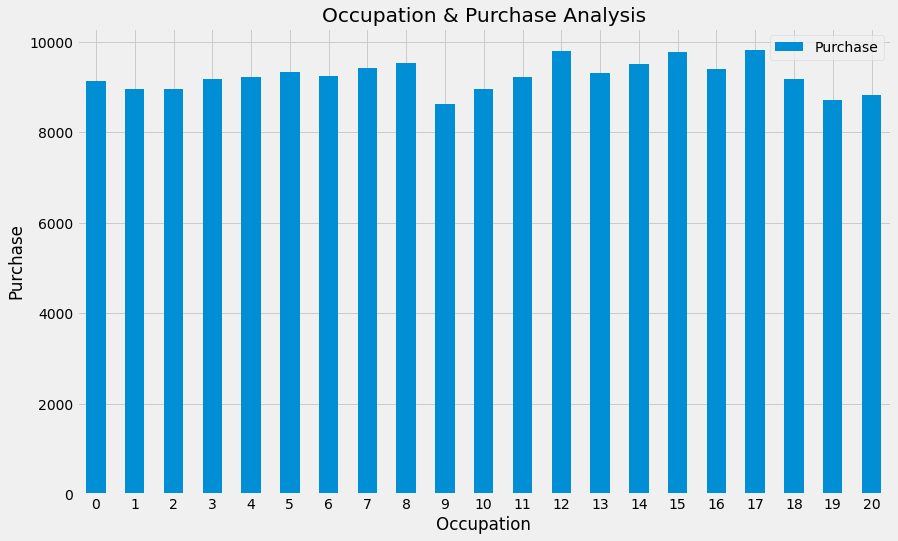

In [128]:
#Bivariate Analysis
Occ_plot = train_data.pivot_table(index='Occupation', values = 'Purchase', aggfunc=np.mean)
Occ_plot.plot(kind='bar', figsize=(13,8))
plt.xlabel('Occupation')
plt.ylabel('Purchase')
plt.xticks(rotation=0)
plt.title("Occupation & Purchase Analysis")
plt.show()

In [129]:
#Label Encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
cols = ['Gender','Age','City_Category','Stay_In_Current_City_Years']
for i in cols:
    train_data[i] = le.fit_transform(train_data[i])
train_data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,0,0,10,0,2,0,3,0,0,8370
1,1000001,P00248942,0,0,10,0,2,0,1,6,14,15200
2,1000001,P00087842,0,0,10,0,2,0,12,0,0,1422
3,1000001,P00085442,0,0,10,0,2,0,12,14,0,1057
4,1000002,P00285442,1,6,16,2,4,0,8,0,0,7969


In [130]:
#Train Test Split
X = train_data.drop(columns=['User_ID', 'Product_ID','Purchase'])
y = train_data['Purchase']

In [131]:
#Train Model
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
x_train, x_test, y_train, y_test = train_test_split(X,y, random_state=20, test_size=0.33)
lr_model = LinearRegression(normalize = True)
lr_model.fit(x_train,y_train)

predictions = lr_model.predict(x_test)


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,


In [132]:
#Accuracy check
Linear_MSE = mean_squared_error(y_test, predictions)
print("Linear Regresssion MSE",  np.sqrt(Linear_MSE))

Linear Regresssion MSE 4620.327486456982


In [133]:
from sklearn.tree import DecisionTreeRegressor
dt_model = DecisionTreeRegressor()
dt_model.fit(x_train,y_train)
prediction_dt = dt_model.predict(x_test)
Decision_MSE = mean_squared_error(y_test, prediction_dt)
print("Decision Tree Regresssion MSE", np.sqrt(Decision_MSE))

Decision Tree Regresssion MSE 3375.7452806208225


In [134]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor()
rf_model.fit(x_train,y_train)
prediction_rf = rf_model.predict(x_test)
Random_MSE = mean_squared_error(y_test, prediction_rf)
print("Random Forest Regresssion MSE",np.sqrt(Random_MSE))

Random Forest Regresssion MSE 3060.6788135711154


In [146]:
from xgboost.sklearn import XGBRegressor
xg_model = XGBRegressor()
xg_model.fit(x_train,y_train)
prediction_xg = xg_model.predict(x_test)
xg_MSE = mean_squared_error(y_test, prediction_xg)
print("XGB Regresssion MSE",np.sqrt(xg_MSE))

XGB Regresssion MSE 2872.890763422955


In [136]:
#Label Encoding for test dataset
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
cols = ['Gender','Age','City_Category','Stay_In_Current_City_Years']
for i in cols:
    test_data[i] = le.fit_transform(test_data[i])
test_data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,1,4,7,1,2,1,1,11.0,NaN
1,1000009,P00113442,1,2,17,2,0,0,3,5.0,NaN
2,1000010,P00288442,0,3,1,1,4,1,5,14.0,NaN
3,1000010,P00145342,0,3,1,1,4,1,4,9.0,NaN
4,1000011,P00053842,0,2,1,2,1,0,4,5.0,12.0


In [137]:
test = test_data.drop(columns=['User_ID', 'Product_ID'])
test.shape

(233599, 9)

In [138]:

pred = xg_model.predict(test)
pred

array([14679.921 , 10583.2705,  6629.9814, ..., 12861.673 , 19663.428 ,
        1859.8932], dtype=float32)

In [139]:
output = pd.DataFrame({"Purchase": pred, "User_ID": test_data.User_ID, "Product_ID": test_data.Product_ID,})

output.to_csv('./output.csv', index = False)